In [2]:
import numpy as np
import matplotlib.pyplot as plt
from qiskit.transpiler import PassManager
from qiskit.transpiler.passes import Unroller

import sys, os
sys.path.append(os.path.abspath(os.path.join('..', 'Grover')))

from grover import *

In [3]:
error_probs = np.linspace(0,1)


Text(0, 0.5, 'Success probability')

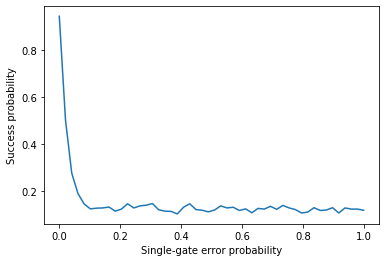

In [6]:
succes_prob = []
for err in error_probs:
    test, noise_model, basis_gates = grover(['111'], 'noancilla',err)
    simulator = Aer.get_backend('qasm_simulator')
    count = execute(test,simulator,basis_gates=basis_gates,
                     noise_model=noise_model).result().get_counts()
    
    succes_prob.append(count['111']/1024)

plt.plot(error_probs, succes_prob)
plt.xlabel('Single-gate error probability')
plt.ylabel('Success probability')

Text(0, 0.5, 'Success probability')

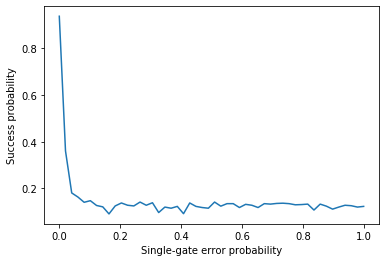

In [7]:
succes_prob = []
for err in error_probs:
    test, noise_model, basis_gates = grover(['111'], 'ancilla',err)
    simulator = Aer.get_backend('qasm_simulator')
    count = execute(test,simulator,basis_gates=basis_gates,
                     noise_model=noise_model).result().get_counts()
    
    succes_prob.append(count['111']/1024)

plt.plot(error_probs, succes_prob)
plt.xlabel('Single-gate error probability')
plt.ylabel('Success probability')

In [8]:
elements = []
for i in range(2,20):
    elements.append('1'*i)

In [9]:
pass_ = Unroller(['u3', 'cx'])
pm = PassManager(pass_)
ops_count = []
for element in elements:
    test, noise_model, basis_gates = grover([element], 'ancilla')
    circuit = pm.run(test)
    ops_count.append(circuit.count_ops())


In [10]:
ops_count

[OrderedDict([('u3', 23), ('cx', 7), ('measure', 2)]),
 OrderedDict([('u3', 141), ('cx', 76), ('measure', 3)]),
 OrderedDict([('u3', 330), ('cx', 186), ('measure', 4)]),
 OrderedDict([('u3', 599), ('cx', 344), ('measure', 5)]),
 OrderedDict([('u3', 1136), ('cx', 660), ('measure', 6)]),
 OrderedDict([('u3', 1833), ('cx', 1072), ('measure', 7)]),
 OrderedDict([('u3', 3226), ('cx', 1896), ('measure', 8)]),
 OrderedDict([('u3', 5247), ('cx', 3094), ('measure', 9)]),
 OrderedDict([('u3', 8712), ('cx', 5150), ('measure', 10)]),
 OrderedDict([('u3', 13593), ('cx', 8050), ('measure', 11)]),
 OrderedDict([('u3', 21414), ('cx', 12700), ('measure', 12)]),
 OrderedDict([('u3', 33243), ('cx', 19738), ('measure', 13)]),
 OrderedDict([('u3', 50816), ('cx', 30200), ('measure', 14)]),
 OrderedDict([('u3', 77833), ('cx', 46292), ('measure', 15)]),
 OrderedDict([('u3', 118206), ('cx', 70350), ('measure', 16)]),
 OrderedDict([('u3', 178371), ('cx', 106216), ('measure', 17)]),
 OrderedDict([('u3', 268556),

In [11]:
counts = []
for i in range(len(ops_count)):
    counts.append(ops_count[i]['u3'] + ops_count[i]['cx'])

Text(0, 0.5, 'number of u3 and cnot gates combined')

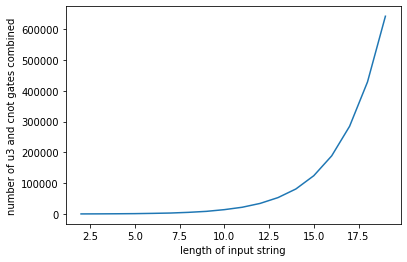

In [14]:
plt.plot(range(2,20),counts)
plt.xlabel('length of input string')
plt.ylabel('number of u3 and cnot gates combined')

In [ ]:
pass_ = Unroller(['u3', 'cx'])
pm = PassManager(pass_)
ops_count_2 = []
for element in elements:
    test, noise_model, basis_gates = grover([element], 'noancilla')
    circuit = pm.run(test)
    ops_count_2.append(circuit.count_ops())


In [ ]:
ops_count_2